In [3]:
!pip install numpy pandas matplotlib scikit-learn


Defaulting to user installation because normal site-packages is not writeable
  Using cached pandas-2.3.3-cp311-cp311-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl.metadata (91 kB)
  Using cached matplotlib-3.10.7-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached scikit_learn-1.7.2-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached contourpy-1.3.3-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (112 kB)
  Using cached kiwisolver-1.4.9-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (6.3 kB)
  Using cached pillow-12.0.0-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (8.8 kB)
  Using cached pyparsing-3.2.5-py3-

In [4]:
# Import required libraries
import random
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

In [5]:
# ------------------------------------------------------------
# 1. Basics of Probability
# ------------------------------------------------------------

# a. Tossing a coin 10,000 times
n_tosses = 10000
heads = 0
tails = 0

for _ in range(n_tosses):
    toss = random.choice(['H', 'T'])
    if toss == 'H':
        heads += 1
    else:
        tails += 1

p_heads = heads / n_tosses
p_tails = tails / n_tosses

print("1(a) Coin Toss Simulation:")
print(f"Probability of Heads: {p_heads:.4f}")
print(f"Probability of Tails: {p_tails:.4f}\n")

# b. Rolling two dice and computing probability of sum = 7
n_rolls = 10000
count_sum7 = 0

for _ in range(n_rolls):
    dice1 = random.randint(1, 6)
    dice2 = random.randint(1, 6)
    if dice1 + dice2 == 7:
        count_sum7 += 1

p_sum7 = count_sum7 / n_rolls
print("1(b) Dice Roll Simulation:")
print(f"Probability of getting sum = 7: {p_sum7:.4f}\n")

1(a) Coin Toss Simulation:
Probability of Heads: 0.4993
Probability of Tails: 0.5007

1(b) Dice Roll Simulation:
Probability of getting sum = 7: 0.1671



In [6]:
# ------------------------------------------------------------
# 2. Probability of at least one 6 in 10 rolls of a fair die
# ------------------------------------------------------------

def prob_at_least_one_six(trials=10000, rolls=10):
    success = 0
    for _ in range(trials):
        rolls_outcome = [random.randint(1,6) for _ in range(rolls)]
        if 6 in rolls_outcome:
            success += 1
    return success / trials

p_one_six = prob_at_least_one_six()
print("2. Probability of at least one 6 in 10 rolls:", round(p_one_six, 4), "\n")


2. Probability of at least one 6 in 10 rolls: 0.8292 



In [7]:
# ------------------------------------------------------------
# 3. Conditional Probability and Bayes' Theorem
# ------------------------------------------------------------

colors = ['red']*5 + ['green']*7 + ['blue']*8
n_trials = 1000
draws = []

# Simulate 1000 draws (with replacement)
for _ in range(n_trials):
    draws.append(random.choice(colors))

# Compute conditional probabilities
count_blue_then_red = 0
count_prev_blue = 0

for i in range(1, len(draws)):
    if draws[i-1] == 'blue':
        count_prev_blue += 1
        if draws[i] == 'red':
            count_blue_then_red += 1

p_red_given_blue = count_blue_then_red / count_prev_blue if count_prev_blue > 0 else 0
p_red = draws.count('red') / len(draws)
p_blue = draws.count('blue') / len(draws)
p_blue_given_red = sum(1 for i in range(1,len(draws)) if draws[i-1]=='red' and draws[i]=='blue') / sum(1 for c in draws[:-1] if c=='red')

# Verify Bayes theorem: P(A|B)*P(B) ≈ P(B|A)*P(A)
lhs = p_red_given_blue * p_blue
rhs = p_blue_given_red * p_red

print("3. Conditional Probability Simulation:")
print(f"P(Red | Blue) = {p_red_given_blue:.4f}")
print(f"P(Blue | Red) = {p_blue_given_red:.4f}")
print(f"P(Red) = {p_red:.4f}, P(Blue) = {p_blue:.4f}")
print(f"Bayes Check (LHS ≈ RHS): {lhs:.4f} ≈ {rhs:.4f}\n")


3. Conditional Probability Simulation:
P(Red | Blue) = 0.2250
P(Blue | Red) = 0.3755
P(Red) = 0.2460, P(Blue) = 0.4000
Bayes Check (LHS ≈ RHS): 0.0900 ≈ 0.0924



In [8]:
# ------------------------------------------------------------
# 4. Random Variables and Discrete Probability
# ------------------------------------------------------------

values = [1, 2, 3]
probabilities = [0.25, 0.35, 0.4]

sample = np.random.choice(values, size=1000, p=probabilities)

mean_empirical = np.mean(sample)
var_empirical = np.var(sample)
std_empirical = np.std(sample)

print("4. Discrete Random Variable:")
print(f"Mean = {mean_empirical:.4f}")
print(f"Variance = {var_empirical:.4f}")
print(f"Std Deviation = {std_empirical:.4f}\n")


4. Discrete Random Variable:
Mean = 2.1490
Variance = 0.6328
Std Deviation = 0.7955



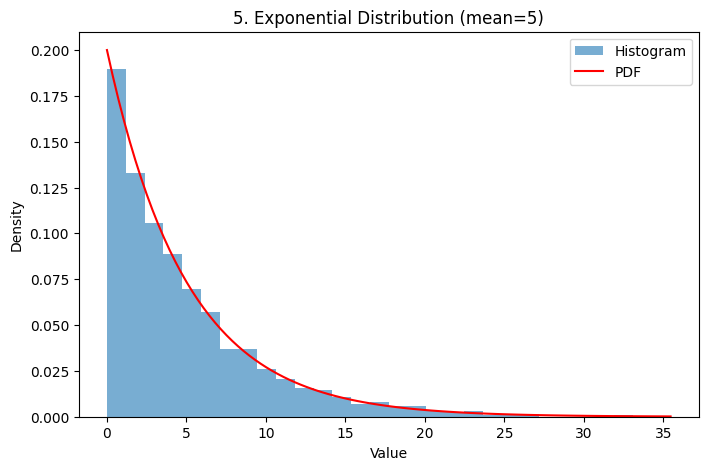

In [9]:
# ------------------------------------------------------------
# 5. Continuous Random Variable (Exponential Distribution)
# ------------------------------------------------------------

data = np.random.exponential(scale=5, size=2000)

plt.figure(figsize=(8,5))
plt.hist(data, bins=30, density=True, alpha=0.6, label='Histogram')

# PDF overlay
x = np.linspace(0, max(data), 100)
pdf = (1/5) * np.exp(-x/5)
plt.plot(x, pdf, color='red', label='PDF')
plt.title("5. Exponential Distribution (mean=5)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()


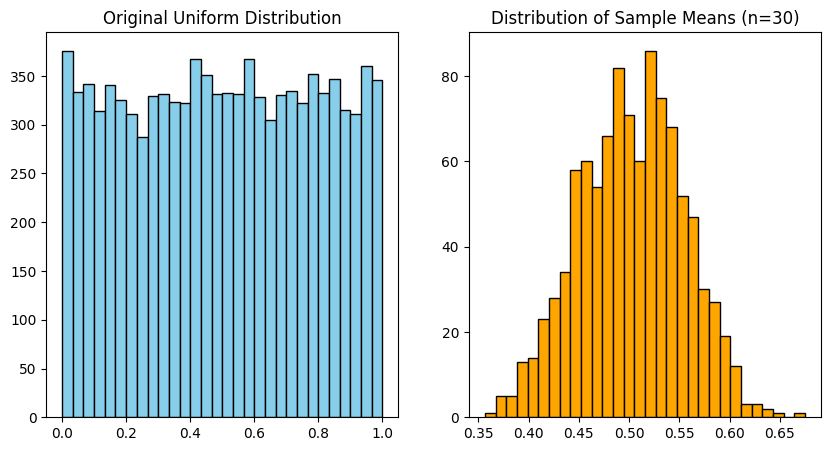

In [10]:
# ------------------------------------------------------------
# 6. Central Limit Theorem Simulation
# ------------------------------------------------------------

# Generate 10,000 uniform random numbers
uniform_data = np.random.uniform(0, 1, 10000)

# Take 1000 samples of size 30 and compute means
sample_means = [np.mean(np.random.choice(uniform_data, 30)) for _ in range(1000)]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(uniform_data, bins=30, color='skyblue', edgecolor='black')
plt.title("Original Uniform Distribution")

plt.subplot(1,2,2)
plt.hist(sample_means, bins=30, color='orange', edgecolor='black')
plt.title("Distribution of Sample Means (n=30)")
plt.show()